In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [4]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [10]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [9]:
df['account'].nunique()

100

In [13]:
df['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [14]:
df['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

### Transaction Value by Dates

In [16]:
df_group = df.groupby('date')["amount"].sum().reset_index()

In [17]:
df_group

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50
...,...,...
86,2018-10-27,6971.58
87,2018-10-28,8438.11
88,2018-10-29,38549.14
89,2018-10-30,22062.34


<AxesSubplot:xlabel='date', ylabel='amount'>

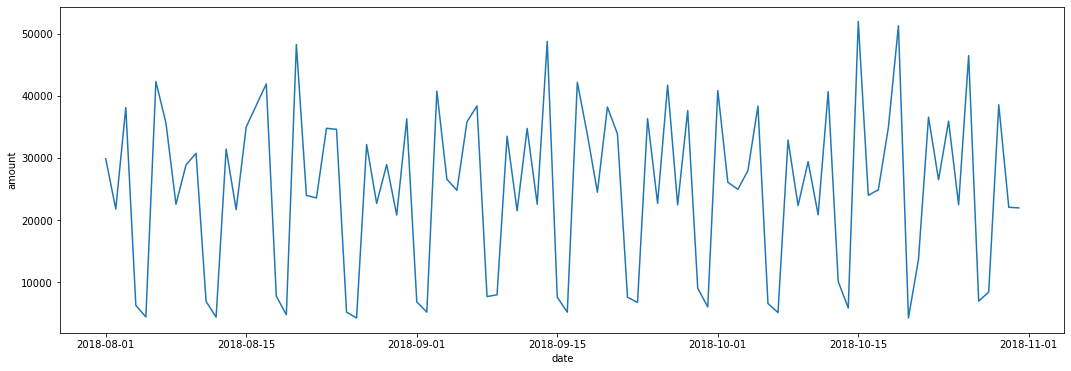

In [21]:
plt.figure(figsize= (18,6))
sns.lineplot(data = df_group,y='amount',x='date')

### Mean Transection Per Day 

In [22]:
df_mean = df.groupby('date')['amount'].mean().reset_index()

In [23]:
df_mean.head()

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000


<AxesSubplot:xlabel='date', ylabel='amount'>

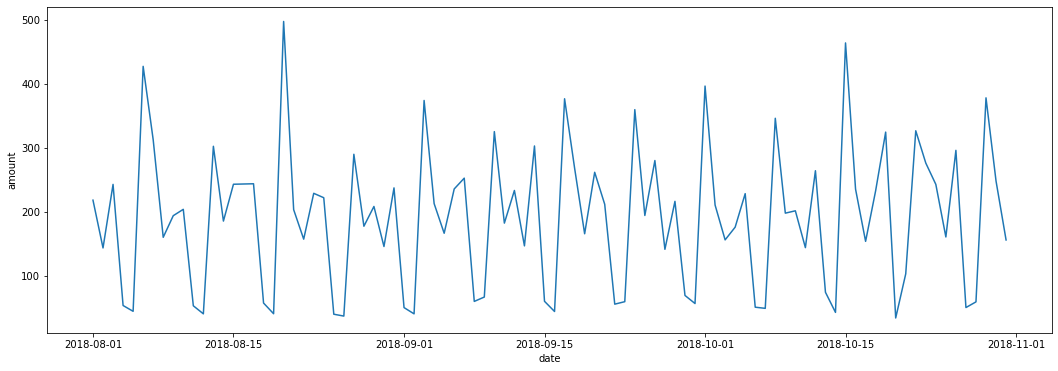

In [24]:
plt.figure(figsize= (18,6))
sns.lineplot(data = df_mean,y='amount',x='date')

### Transaction Volume By Gender

In [27]:
gender_vol = df[['date','amount','gender']]
gender_vol.head()

,date,amount,gender
0,2018-08-01,16.25,F
1,2018-08-01,14.19,F
2,2018-08-01,6.42,M
3,2018-08-01,40.90,F
4,2018-08-01,3.25,F


In [28]:
df_gender = df.groupby(['date','gender'])['amount'].sum().reset_index()
df_gender.head()

,date,gender,amount
0,2018-08-01,F,13628.64
1,2018-08-01,M,16239.30
2,2018-08-02,F,5896.25
3,2018-08-02,M,15890.07
4,2018-08-03,F,17091.59


<AxesSubplot:xlabel='date', ylabel='amount'>

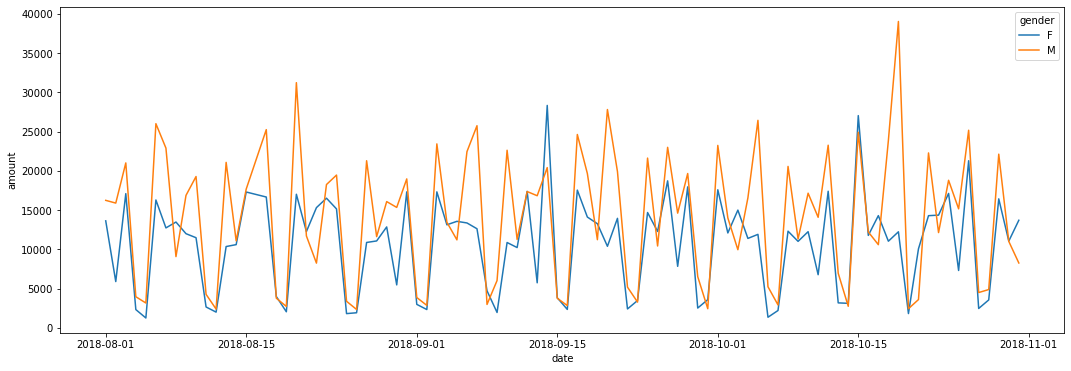

In [29]:
plt.figure(figsize= (18,6))
sns.lineplot(data = df_gender,y='amount',x='date',hue='gender')

### Mean Transction by Gender

In [30]:
df_gender_mean = df.groupby(['date','gender'])['amount'].mean().reset_index()
df_gender_mean.head()

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241


<AxesSubplot:xlabel='date', ylabel='amount'>

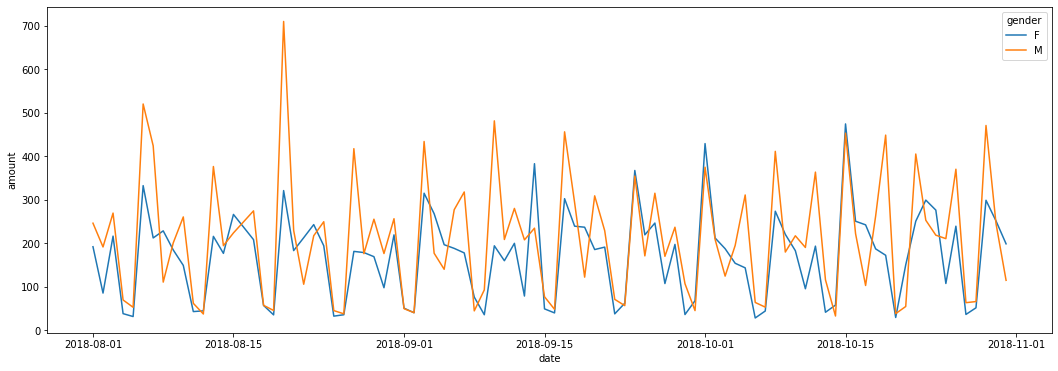

In [31]:
plt.figure(figsize= (18,6))
sns.lineplot(data = df_gender_mean,y='amount',x='date',hue='gender')

### Transaction volume by merchant state

In [32]:
merchant_state = df.groupby(["date","merchant_state"])["amount"].sum().reset_index()
merchant_state.head()

,date,merchant_state,amount
0,2018-08-01,NSW,828.36
1,2018-08-01,NT,73.25
2,2018-08-01,QLD,921.76
3,2018-08-01,SA,62.37
4,2018-08-01,TAS,17.13


In [33]:
df['merchant_state'].nunique()

8

<AxesSubplot:xlabel='date', ylabel='amount'>

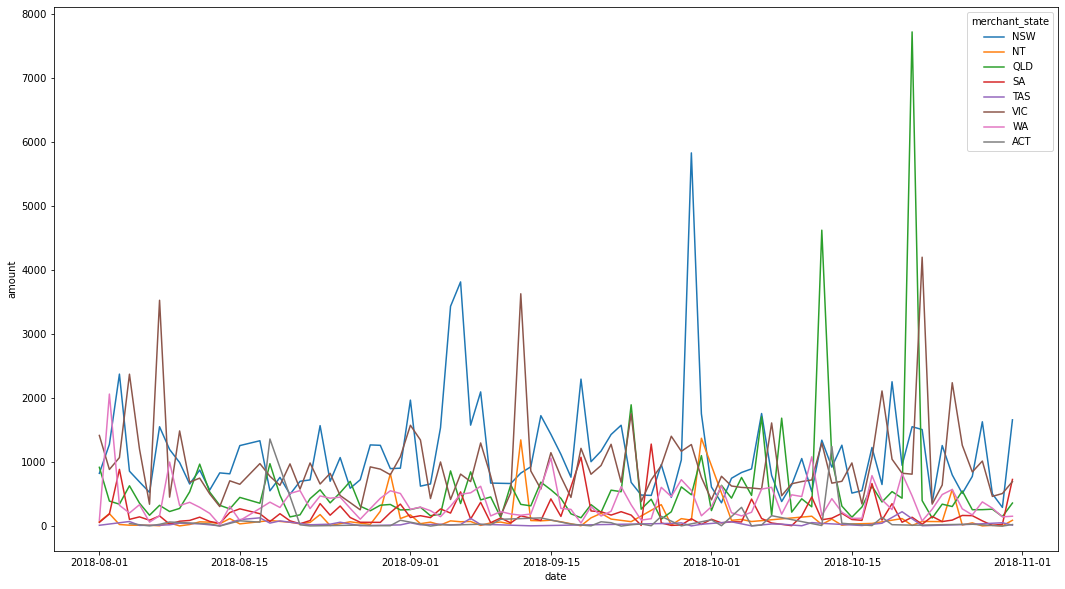

In [35]:
plt.figure(figsize= (18,10))
sns.lineplot(data = merchant_state,y='amount',x='date',hue='merchant_state')

### Transaction volume by merchant state (barplot)

In [36]:
merchant_state_total = df.groupby(["merchant_state","gender"])["amount"].sum().reset_index()
merchant_state_total

,merchant_state,gender,amount
0,ACT,F,1657.44
1,ACT,M,3219.24
2,NSW,F,41430.88
3,NSW,M,60590.89
4,NT,F,8741.42
5,NT,M,427.47
6,QLD,F,28611.05
7,QLD,M,24872.40
8,SA,F,11349.73
9,SA,M,5426.84


<AxesSubplot:xlabel='amount', ylabel='merchant_state'>

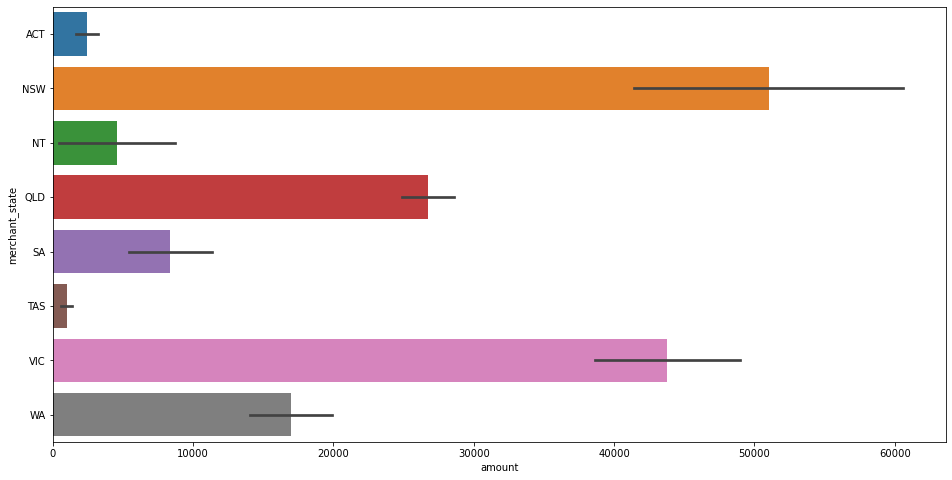

In [38]:
plt.figure(figsize=(16,8))
sns.barplot(y='merchant_state', x= 'amount', data = merchant_state_total)

<AxesSubplot:xlabel='amount', ylabel='merchant_state'>

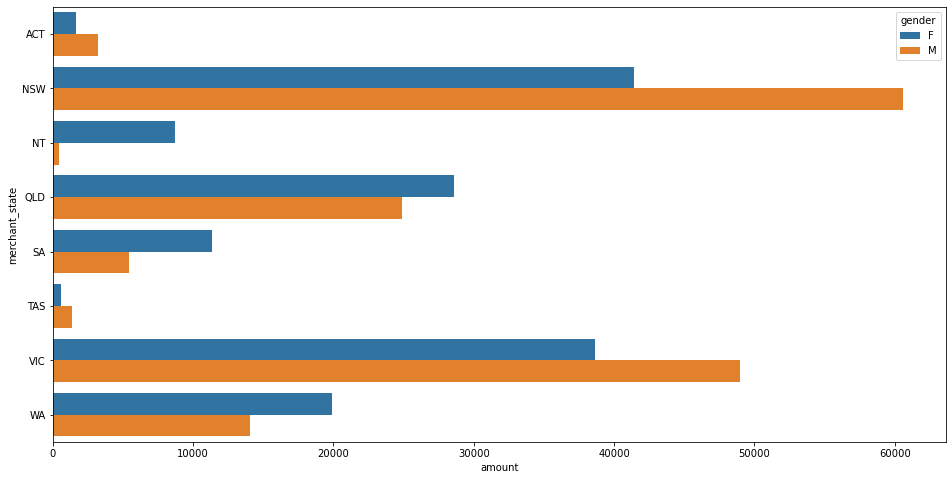

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(y='merchant_state', x= 'amount', hue ='gender', data = merchant_state_total)

### Mean Transaction Volume by merchant state 

In [42]:
merchant_state_mean = df.groupby(["date","merchant_state"])["amount"].mean().reset_index()
merchant_state_mean.head()

,date,merchant_state,amount
0,2018-08-01,NSW,29.584286
1,2018-08-01,NT,24.416667
2,2018-08-01,QLD,54.221176
3,2018-08-01,SA,15.592500
4,2018-08-01,TAS,17.130000


<AxesSubplot:xlabel='date', ylabel='amount'>

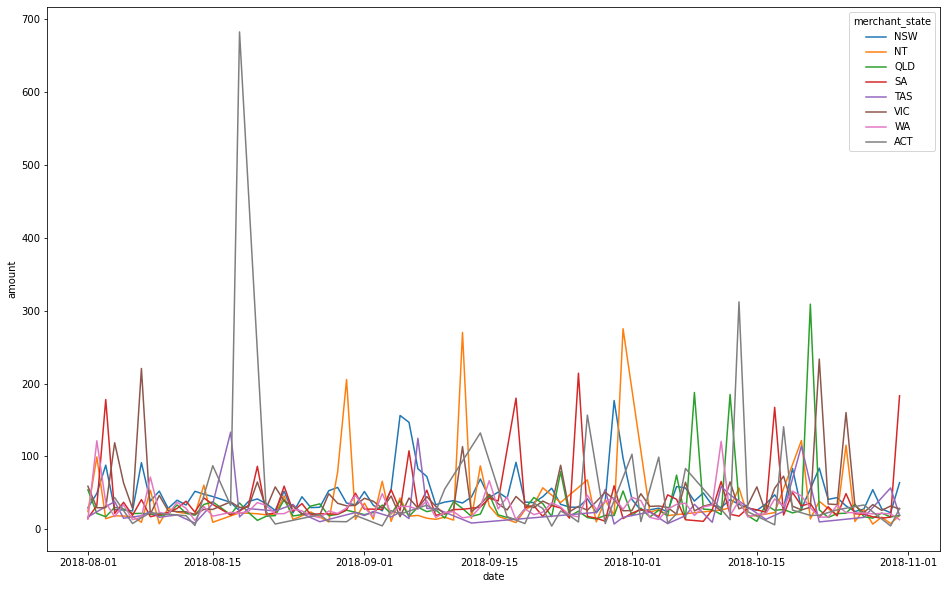

In [43]:
plt.figure(figsize=(16, 10))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=merchant_state_mean)

### Transaction volume by mearchant suburb()

In [44]:
merchant_suburb = df.groupby(['merchant_suburb'])['amount'].sum().reset_index()
merchant_suburb.head()

,merchant_suburb,amount
0,Abbotsford,2004.29
1,Aberdeen,52.45
2,Aberfeldie,57.77
3,Aberfoyle Park,84.92
4,Acacia Ridge,10.30


In [45]:

suburb_sorted=merchant_suburb.sort_values(by='amount', ascending=False)
print("Top 10 regions with most value of transactions over 91 days are-")
print(suburb_sorted.head(10).values)

Top 10 regions with most value of transactions over 91 days are-
[['Sydney' 21675.44000000002]
 ['Melbourne' 11943.529999999995]
 ['South Brisbane' 11740.58]
 ['Mascot' 10282.619999999999]
 ['Mount Gambier' 4710.25]
 ['Malvern' 3994.8300000000004]
 ['Maribyrnong' 3770.8299999999995]
 ['Parap' 3323.51]
 ['Brisbane City' 2724.45]
 ['Mount Gravatt' 2721.14]]


In [46]:
tuple_suburb_sum = [tuple(x) for x in merchant_suburb.values]

### Transaction volume by merchant suburb (mean)

In [51]:
merchant_suburb_mean= df.groupby(["merchant_suburb"])["amount"].mean().reset_index()
merchant_suburb_mean.head(5)

,merchant_suburb,amount
0,Abbotsford,400.858
1,Aberdeen,26.225
2,Aberfeldie,57.770
3,Aberfoyle Park,42.460
4,Acacia Ridge,10.300


In [52]:
suburb_sorted_mean=merchant_suburb_mean.sort_values(by='amount', ascending=False)

In [53]:
print("Top 10 regions with most mean value of transactions over 91 days are-")
print(suburb_sorted_mean.head(10).values)

Top 10 regions with most mean value of transactions over 91 days are-
[['Pantapin' 829.7650000000001]
 ['Gladesville' 734.1]
 ['West Wodonga' 559.33]
 ['South Brisbane' 559.0752380952381]
 ['Parap' 553.9183333333334]
 ['Lowlands' 524.58]
 ['Mossman Gorge' 501.67]
 ['Fairlight' 496.76]
 ['Deakin' 491.5066666666667]
 ['Mount Gravatt' 453.5233333333333]]


### Account balance (total/bank assets) over dates

In [54]:
acc_bal_total= df.groupby(["date",'gender'])["balance"].sum().reset_index()
acc_bal_total.head(5)

,date,gender,balance
0,2018-08-01,F,619748.69
1,2018-08-01,M,741205.93
2,2018-08-02,F,707846.59
3,2018-08-02,M,1414623.33
4,2018-08-03,F,296789.02


<AxesSubplot:xlabel='date', ylabel='balance'>

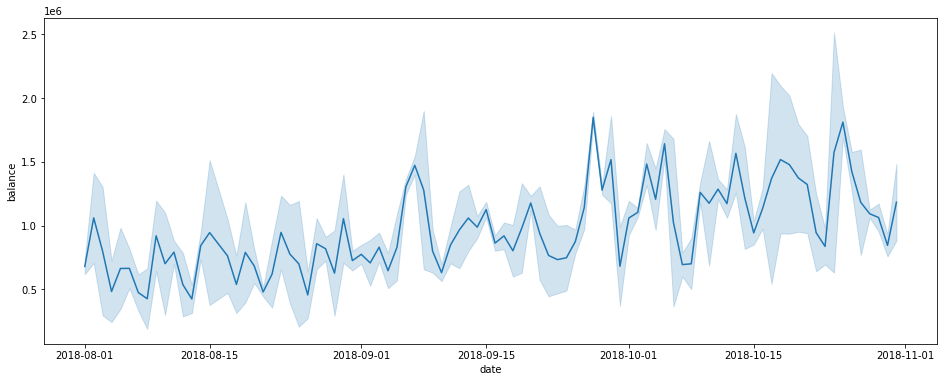

In [56]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",data=acc_bal_total)

### Account balance (mean) over dates

In [57]:
acc_bal_mean= df.groupby(["date",'gender'])["balance"].mean().reset_index()
acc_bal_mean.head(5)

,date,gender,balance
0,2018-08-01,F,8728.854789
1,2018-08-01,M,11230.392879
2,2018-08-02,F,10258.646232
3,2018-08-02,M,17043.654578
4,2018-08-03,F,3756.823038


<AxesSubplot:xlabel='date', ylabel='balance'>

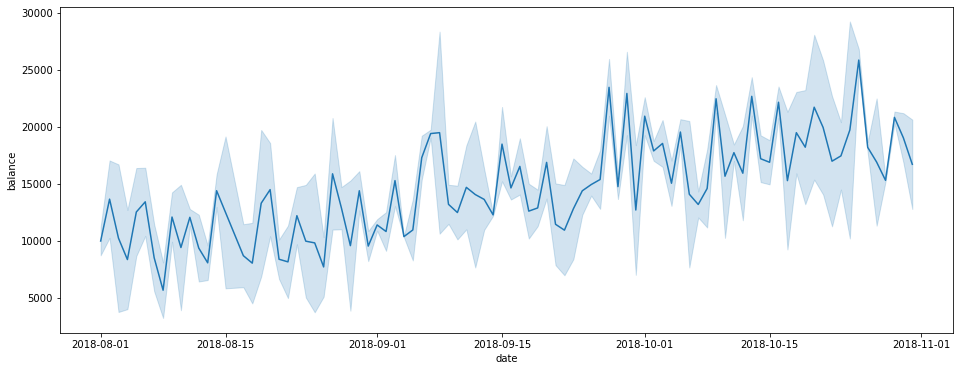

In [58]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",data=acc_bal_mean)

<AxesSubplot:xlabel='date', ylabel='balance'>

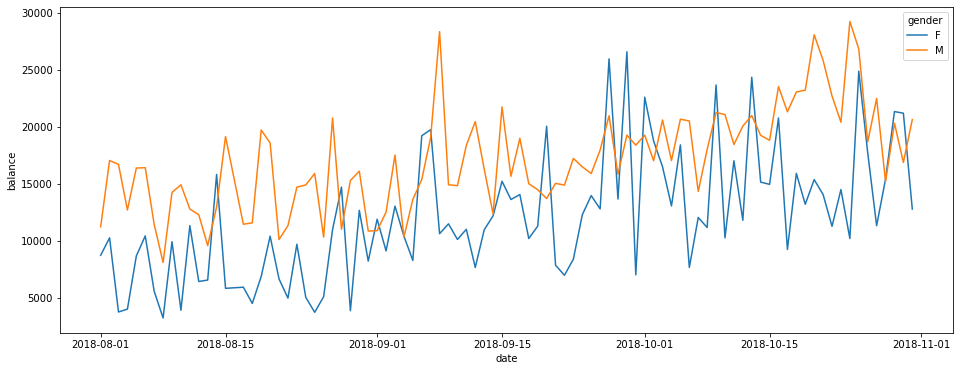

In [59]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",hue="gender",data=acc_bal_mean)

### Account balance (mean) for various states over dates

In [60]:
acc_bal_state_mean= df.groupby(["date",'merchant_state'])["balance"].mean().reset_index()
acc_bal_state_mean.head(5)

,date,merchant_state,balance
0,2018-08-01,NSW,3570.146429
1,2018-08-01,NT,366.056667
2,2018-08-01,QLD,5459.165294
3,2018-08-01,SA,5728.495000
4,2018-08-01,TAS,6924.650000


<AxesSubplot:xlabel='date', ylabel='balance'>

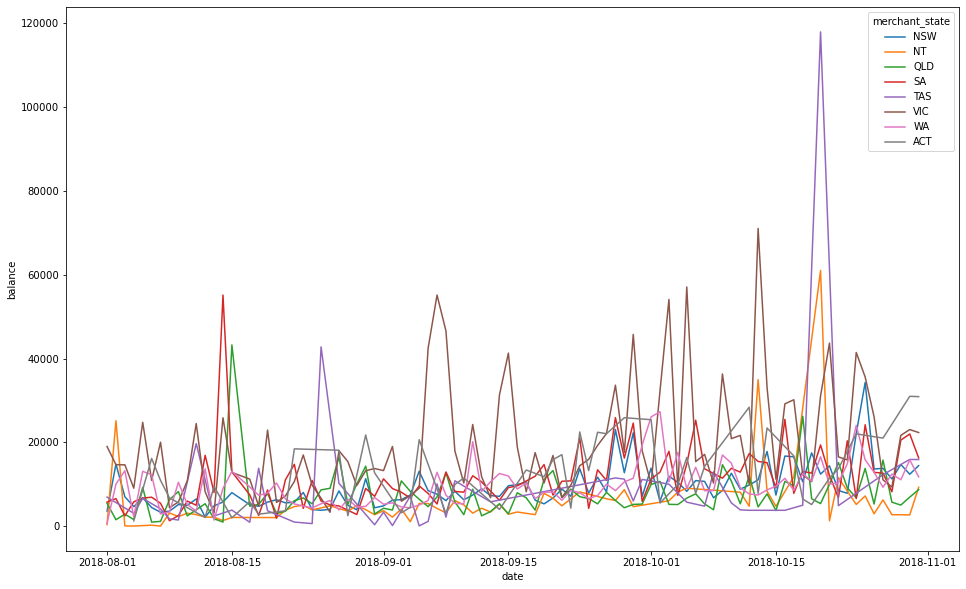

In [61]:
plt.figure(figsize=(16, 10))
sns.lineplot(y="balance",x="date",hue="merchant_state",data=acc_bal_state_mean)

### Account balance (mean) for various states (days average)

In [68]:
acc_bal_state= df.groupby(['merchant_state',"gender"])["balance"].mean().reset_index()
acc_bal_state.head()


,merchant_state,gender,balance
0,ACT,F,14433.733913
1,ACT,M,9176.572593
2,NSW,F,8855.846765
3,NSW,M,9936.826013
4,NT,F,4730.673850


<AxesSubplot:xlabel='balance', ylabel='merchant_state'>

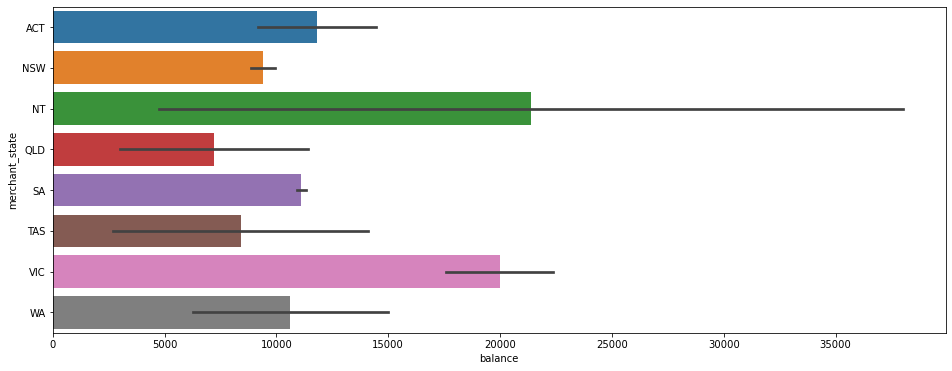

In [69]:
plt.figure(figsize=(16, 6))
sns.barplot(x="balance", y="merchant_state",  data=acc_bal_state)

<AxesSubplot:xlabel='balance', ylabel='merchant_state'>

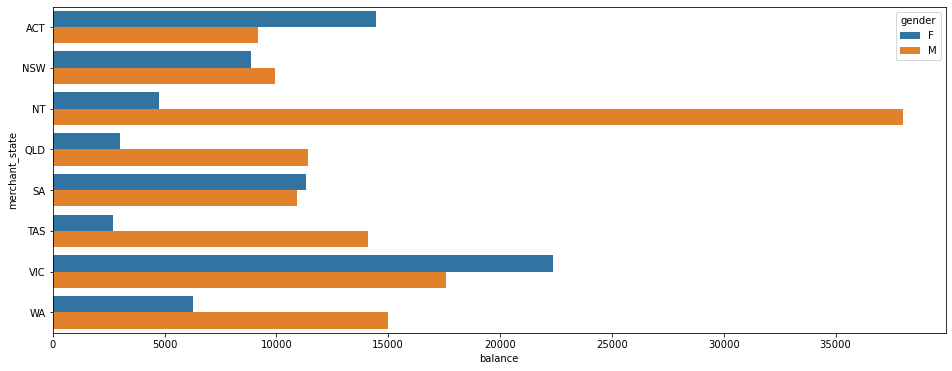

In [70]:
plt.figure(figsize=(16, 6))
sns.barplot(x="balance", y="merchant_state",hue="gender",  data=acc_bal_state)

### Total Transaction by age 

In [71]:
age_amount_sum= df.groupby(['age',"gender"])["amount"].sum().reset_index()
age_amount_sum.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


<AxesSubplot:xlabel='age', ylabel='amount'>

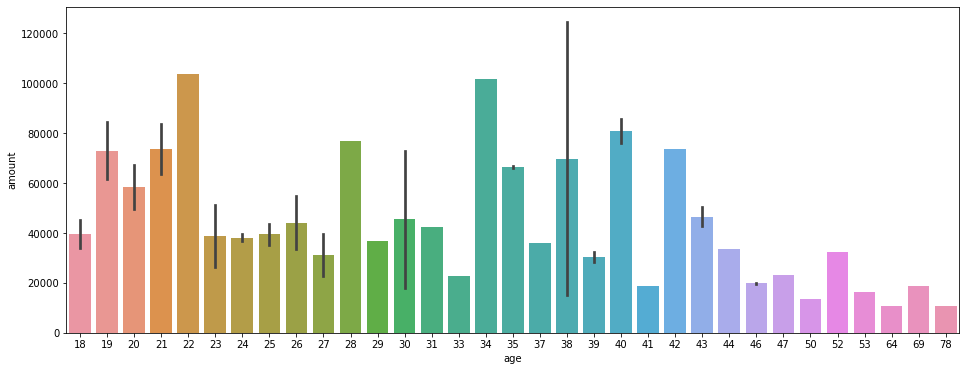

In [72]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=age_amount_sum)

<AxesSubplot:xlabel='age', ylabel='amount'>

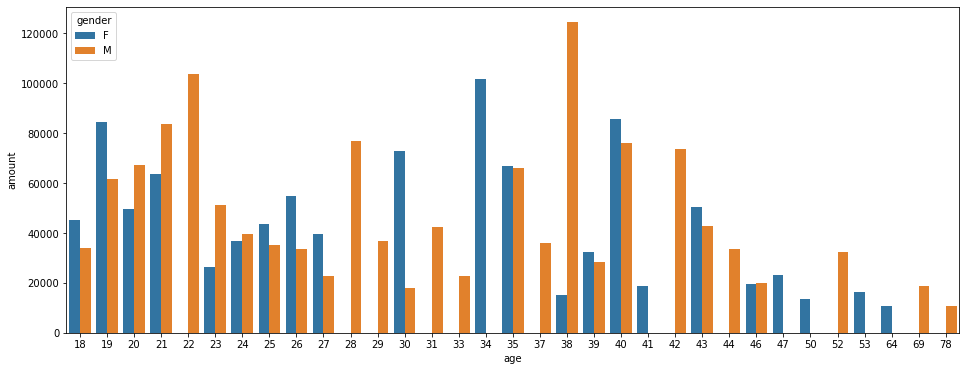

In [73]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age", hue="gender" ,data=age_amount_sum)

### Mean transaction by age

In [74]:
age_amount_mean= df.groupby(['age',"gender"])["amount"].mean().reset_index()
age_amount_mean.head()

,age,gender,amount
0,18,F,151.933131
1,18,M,234.624138
2,19,F,244.402319
3,19,M,177.396322
4,20,F,135.835041


<AxesSubplot:xlabel='age', ylabel='amount'>

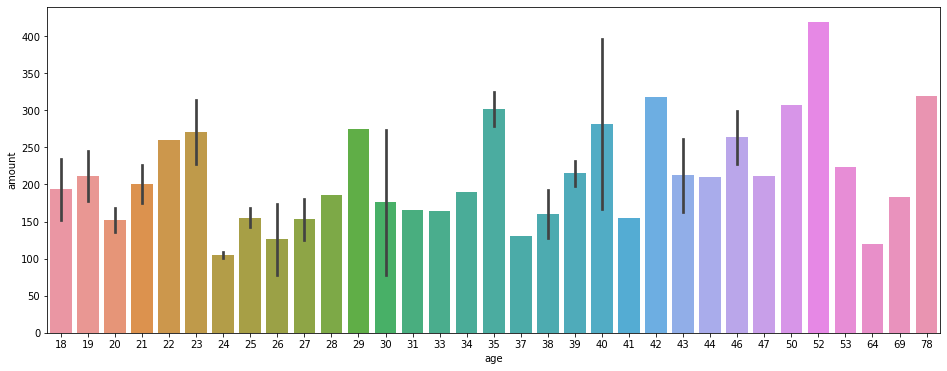

In [75]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=age_amount_mean)

<AxesSubplot:xlabel='age', ylabel='amount'>

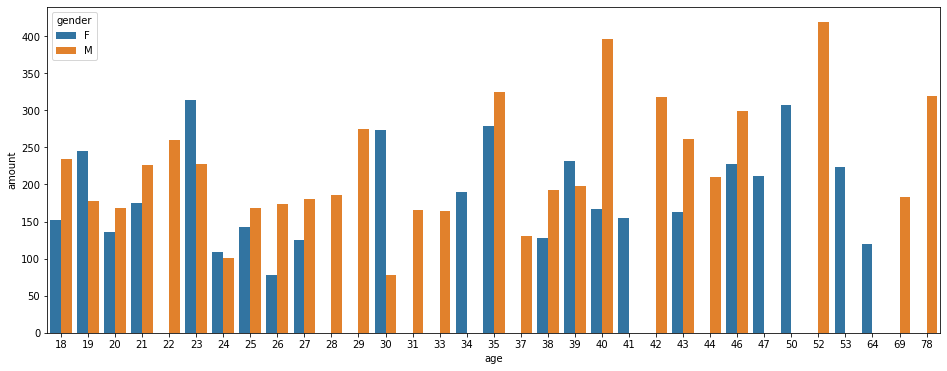

In [76]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age", hue="gender", data=age_amount_mean)

### Debit or Credit transaction mean by gender

In [77]:
debit_credit= df.groupby(["movement","gender"])["amount"].mean().reset_index()
debit_credit

,movement,gender,amount
0,credit,F,1679.370477
1,credit,M,2096.811681
2,debit,F,49.946881
3,debit,M,54.980407


<AxesSubplot:xlabel='movement', ylabel='amount'>

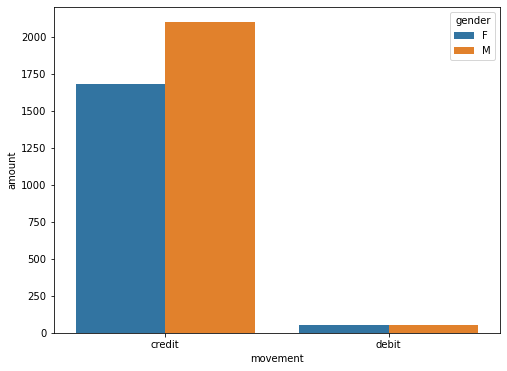

In [78]:
plt.figure(figsize=(8, 6))
sns.barplot(y="amount", x="movement", hue="gender", data=debit_credit)

### Debit-Credit transaction total by gender

In [79]:

debit_credit_total= df.groupby(["movement","gender"])["amount"].sum().reset_index()
debit_credit_total

,movement,gender,amount
0,credit,F,703656.23
1,credit,M,972920.62
2,debit,F,266666.40
3,debit,M,320040.95


<AxesSubplot:xlabel='movement', ylabel='amount'>

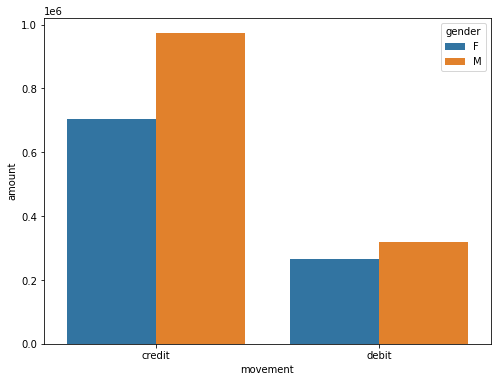

In [81]:
plt.figure(figsize=(8, 6))
sns.barplot(y="amount", x="movement", hue="gender", data=debit_credit_total)

### Debit-Credit transaction sum by age

In [82]:
dc_age_total= df.groupby(["movement","age"])["amount"].sum().reset_index()
dc_age_total.head()

,movement,age,amount
0,credit,18,59762.72
1,credit,19,115785.36
2,credit,20,84511.81
3,credit,21,107137.60
4,credit,22,81124.69


<AxesSubplot:xlabel='movement', ylabel='amount'>

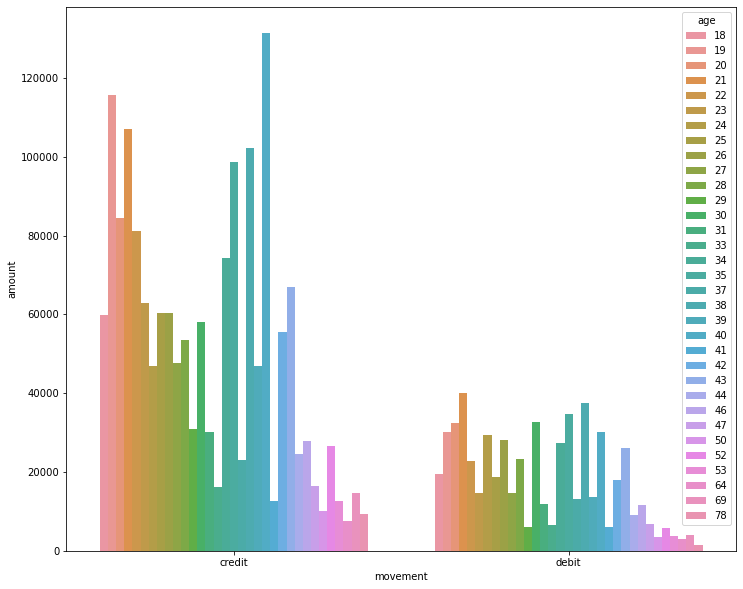

In [83]:
plt.figure(figsize=(12, 10))
sns.barplot(y="amount", x="movement", hue="age", data=dc_age_total)

### Debit-Credit transaction mean by ag

In [84]:
dc_age_mean= df.groupby(["movement","age"])["amount"].mean().reset_index()
dc_age_mean.head()

,movement,age,amount
0,credit,18,1867.585000
1,credit,19,2517.073043
2,credit,20,1509.139464
3,credit,21,1984.029630
4,credit,22,2080.120256


<AxesSubplot:xlabel='movement', ylabel='amount'>

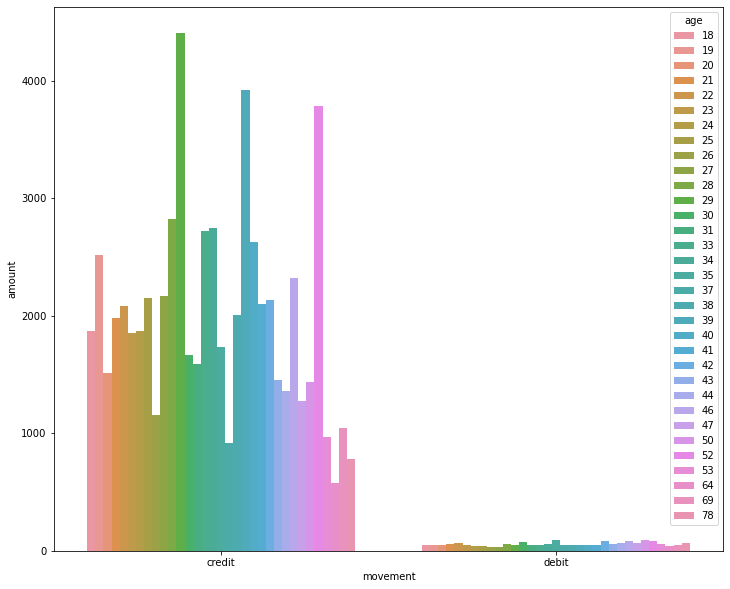

In [85]:
plt.figure(figsize=(12, 10))
sns.barplot(y="amount", x="movement", hue="age", data=dc_age_mean)

In [87]:
df.shape

(12043, 23)

### Grouping by their mean balance and transaction amount

In [88]:
df_cust=df[["customer_id","first_name","age","balance",'amount']]

In [89]:
customer=df_cust.groupby(["customer_id","age","first_name"])["balance","amount"].mean().reset_index()

<ipython-input-89-05f48263af3f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer=df_cust.groupby(["customer_id","age","first_name"])["balance","amount"].mean().reset_index()


In [90]:
customer

,customer_id,age,first_name,balance,amount
0,CUS-1005756958,53,Stephanie,2275.852055,222.862603
1,CUS-1117979751,21,Lucas,9829.929000,339.843700
2,CUS-1140341822,28,Dustin,5699.212250,212.632500
3,CUS-1147642491,34,Robin,9032.841186,245.600169
4,CUS-1196156254,34,Jessica,22272.433755,147.145796
...,...,...,...,...,...
95,CUS-72755508,35,Kimberly,4497.557069,197.213276
96,CUS-809013380,21,Kaitlyn,3756.902903,151.694274
97,CUS-860700529,30,Jeffrey,3462.276009,77.681888
98,CUS-880898248,26,Robert,8528.830385,146.954487


<AxesSubplot:xlabel='amount', ylabel='balance'>

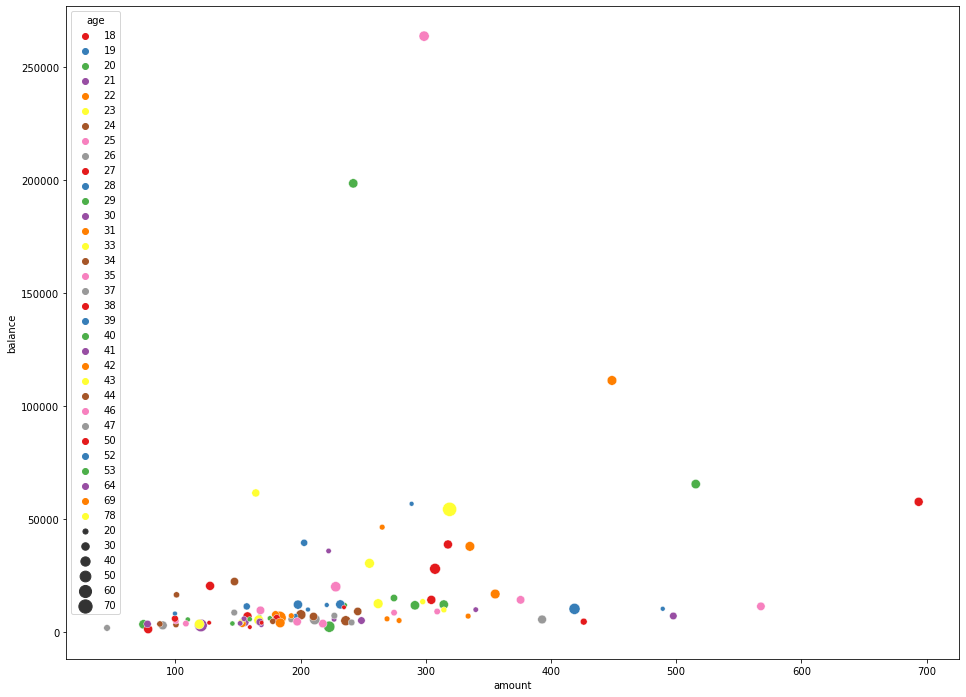

In [91]:
plt.figure(figsize=(16, 12))
sns.scatterplot(y="balance", x="amount",hue="age", palette="Set1", size="age",sizes=(20, 200), data=customer)

In [93]:
#KMeans Clustring
from sklearn.cluster import KMeans

In [94]:
X = customer[['balance','amount']].values
X.shape

(100, 2)

In [95]:
wc = []

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wc.append(km.inertia_)

D:\Anconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


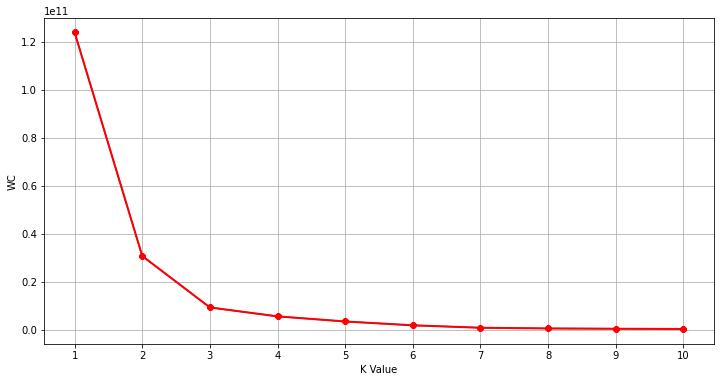

In [97]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wc)
plt.grid()
plt.plot(range(1,11),wc, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WC")
plt.show()

In [98]:
km1 = KMeans(n_clusters=3)

In [99]:
km1.fit(X)

KMeans(n_clusters=3)

In [100]:
y= km1.predict(X)

In [101]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

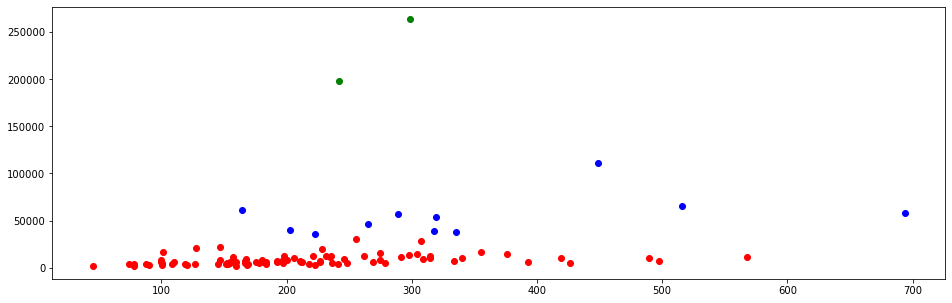

In [102]:
plt.figure(figsize=(16, 5))
plt.scatter(X[y==0,1],X[y==0,0],color='red')
plt.scatter(X[y==1,1],X[y==1,0],color='green')
plt.scatter(X[y==2,1],X[y==2,0],color='blue')

In [103]:
from mpl_toolkits.mplot3d import Axes3D

In [104]:
Y=customer[["balance","amount","age"]].values
Y.shape

(100, 3)

In [105]:

ws=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    ws.append(km.inertia_)

D:\Anconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


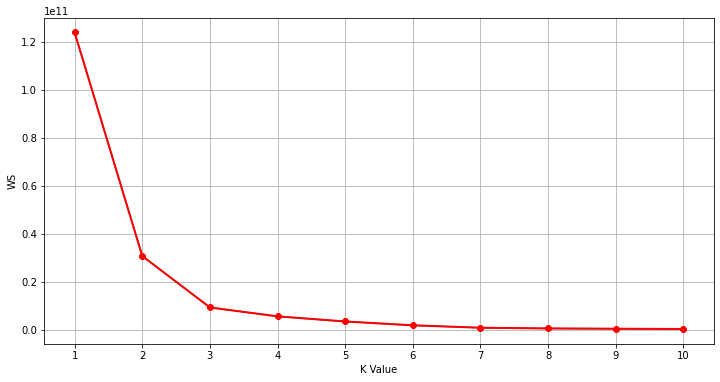

In [106]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),ws)
plt.grid()
plt.plot(range(1,11),ws, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WS")
plt.show()


In [107]:
km2 = KMeans(n_clusters=3)
clusters = km2.fit_predict(X)
customer["label"] = clusters

Text(0.5, 0, 'amount')

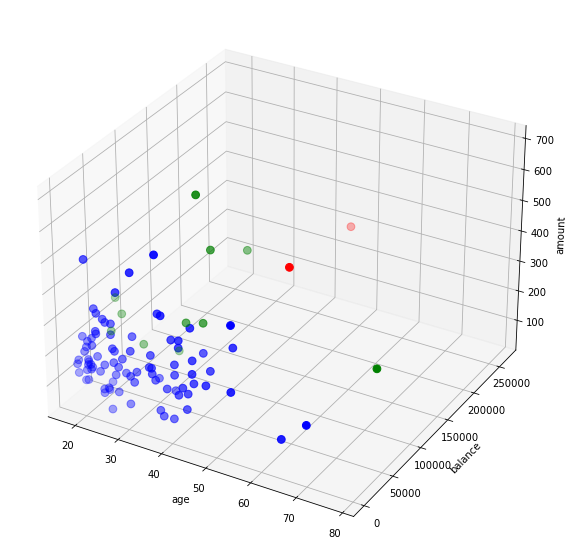

In [108]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer.age[customer.label == 0], customer["balance"][customer.label == 0], customer["amount"][customer.label == 0], c='blue', s=60)
ax.scatter(customer.age[customer.label == 1], customer["balance"][customer.label == 1], customer["amount"][customer.label == 1], c='red', s=60)
ax.scatter(customer.age[customer.label == 2], customer["balance"][customer.label == 2], customer["amount"][customer.label == 2], c='green', s=60)
plt.xlabel("age")
plt.ylabel("balance")
ax.set_zlabel('amount')